In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [1]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 3

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 1,103
Trainable params: 1,103
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 2/10 [=====>........................] - ETA: 1s - loss: 1.2625 - accuracy: 0.3242 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 2s 89ms/step - loss: 1.2181 - accuracy: 0.3576 - val_loss: 1.0566 - val_accuracy: 0.3102
Epoch 2/1000
 1/10 [==>...........................] - ETA: 0s - loss: 1.1575 - accuracy: 0.3516
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 26ms/step - loss: 1.1162 - accuracy: 0.3742 - val_loss: 1.0088 - val_accuracy: 0.3300
Epoch 3/1000
 1/10 [==>...........................] - ETA: 0s - loss: 1.0624 - accuracy: 0.4219
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 1.0606 - accuracy: 0.4015 - val_loss: 0.9775 - val_accuracy: 0.5186
Epoch 4/1000
 1/10 [==>...........................] - ETA: 0s - loss: 1.0817 - accuracy: 0.41

 1/10 [==>...........................] - ETA: 0s - loss: 0.4665 - accuracy: 0.8438
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 39ms/step - loss: 0.4462 - accuracy: 0.8386 - val_loss: 0.2464 - val_accuracy: 0.9851
Epoch 29/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4271 - accuracy: 0.8750
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 31ms/step - loss: 0.4059 - accuracy: 0.8659 - val_loss: 0.2270 - val_accuracy: 0.9851
Epoch 30/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4275 - accuracy: 0.8359
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 33ms/step - loss: 0.4020 - accuracy: 0.8543 - val_loss: 0.2087 - val_accuracy: 0.9851
Epoch 31/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.3582 - accuracy: 0.8906
Epoch

Epoch 55/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.1418 - accuracy: 0.9453
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 0.2301 - accuracy: 0.9214 - val_loss: 0.0873 - val_accuracy: 0.9950
Epoch 56/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4144 - accuracy: 0.8516
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 0.2593 - accuracy: 0.9106 - val_loss: 0.0835 - val_accuracy: 0.9950
Epoch 57/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.2851 - accuracy: 0.8906
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 0.2619 - accuracy: 0.9065 - val_loss: 0.0825 - val_accuracy: 0.9975
Epoch 58/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.2119 - accuracy

Epoch 82/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.1181 - accuracy: 0.9688
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 26ms/step - loss: 0.1506 - accuracy: 0.9487 - val_loss: 0.0436 - val_accuracy: 0.9975
Epoch 83/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.1393 - accuracy: 0.9453
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 27ms/step - loss: 0.1704 - accuracy: 0.9437 - val_loss: 0.0398 - val_accuracy: 0.9975
Epoch 84/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.1408 - accuracy: 0.9609
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 27ms/step - loss: 0.1497 - accuracy: 0.9503 - val_loss: 0.0350 - val_accuracy: 0.9975
Epoch 85/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.1461 - accuracy

Epoch 109/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.1580 - accuracy: 0.9531
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 0.1406 - accuracy: 0.9528 - val_loss: 0.0282 - val_accuracy: 0.9975
Epoch 110/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.1954 - accuracy: 0.9453
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 0.1494 - accuracy: 0.9470 - val_loss: 0.0292 - val_accuracy: 0.9975
Epoch 111/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.1471 - accuracy: 0.9766
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 24ms/step - loss: 0.1257 - accuracy: 0.9685 - val_loss: 0.0288 - val_accuracy: 0.9975
Epoch 112/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.1913 - a

Epoch 136/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.1031 - accuracy: 0.9766
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 0.1126 - accuracy: 0.9619 - val_loss: 0.0199 - val_accuracy: 0.9975
Epoch 137/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.0953 - accuracy: 0.9766
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 26ms/step - loss: 0.1260 - accuracy: 0.9578 - val_loss: 0.0198 - val_accuracy: 0.9975
Epoch 138/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.0929 - accuracy: 0.9688
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 0.1058 - accuracy: 0.9694 - val_loss: 0.0196 - val_accuracy: 0.9975
Epoch 139/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.1762 - a

Epoch 163/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.1491 - accuracy: 0.9609
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 0.1110 - accuracy: 0.9652 - val_loss: 0.0171 - val_accuracy: 0.9975
Epoch 164/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.1178 - accuracy: 0.9609
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 0.1077 - accuracy: 0.9661 - val_loss: 0.0152 - val_accuracy: 0.9975
Epoch 165/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.1543 - accuracy: 0.9297
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 0.1182 - accuracy: 0.9603 - val_loss: 0.0161 - val_accuracy: 0.9975
Epoch 166/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.1103 - a

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

4/4 [==============================] - 0s 4ms/step - loss: 0.0175 - accuracy: 0.9975


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 255ms/step
[9.7482264e-01 2.5077919e-02 9.9421224e-05]
0


# 混同行列

13/13 [==============================] - 0s 2ms/step


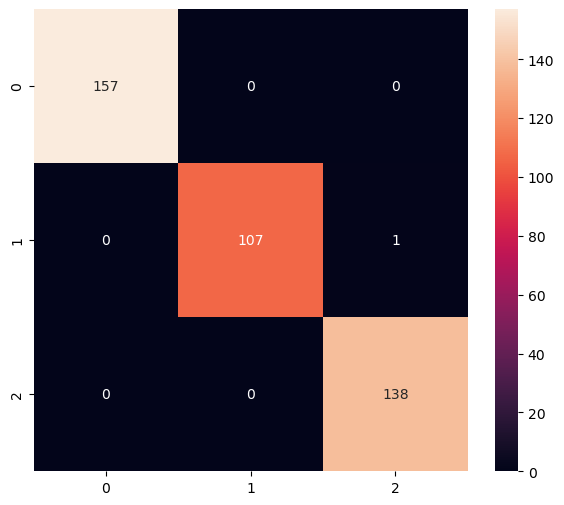

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      0.99      1.00       108
           2       0.99      1.00      1.00       138

    accuracy                           1.00       403
   macro avg       1.00      1.00      1.00       403
weighted avg       1.00      1.00      1.00       403



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Prisha\AppData\Local\Temp\tmpjwygbdgr\assets


6500

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 3.53 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.7482264e-01 2.5077941e-02 9.9421210e-05]
0
